In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Generate a dataset with two Gaussian components
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])

In [3]:
# Save the dataset into a CSV file
df = pd.DataFrame(X, columns=['X'])
df.to_csv('gaussian_dataset.csv', index=False)

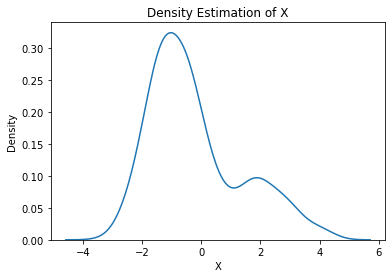

In [4]:
# Plot the density estimation using seaborn
sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()


In [5]:
# Initialize parameters
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)

### EM Algorithm

In [6]:
# Perform EM algorithm for 20 epochs
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    # E-step: Compute responsibilities
    gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
    gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
    total = gamma1 + gamma2
    gamma1 /= total
    gamma2 /= total
    
    # M-step: Update parameters
    mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
    mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
    sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
    sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
    pi1_hat = np.mean(gamma1)
    pi2_hat = np.mean(gamma2)
    
    # Compute log-likelihood
    log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
                                   + pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
    log_likelihoods.append(log_likelihood)


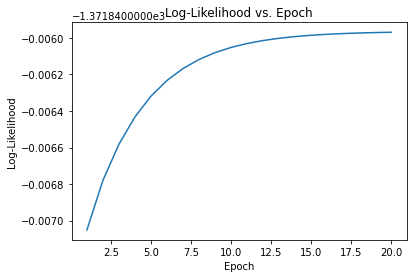

In [7]:
# Plot log-likelihood values over epochs
plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()

### K Means Clustering

In [8]:
# Load the dataset from the CSV file
data = pd.read_csv('gaussian_dataset.csv')

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
kmeans_labels = kmeans.predict(data)

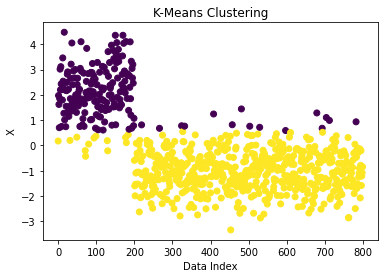

In [9]:
# Plot the K-Means clustering result
plt.scatter(data.index, data['X'], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Data Index')
plt.ylabel('X')
plt.show()


In [10]:
# Compare K-Means clustering with the EM density estimation
plt.figure(figsize=(10, 5))


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

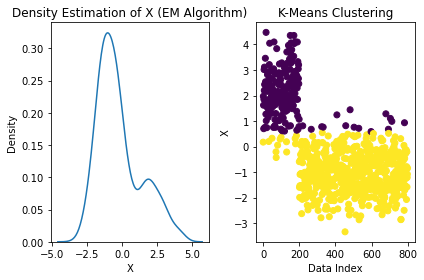

In [13]:

# Plot original KDE
plt.subplot(1, 2, 1)
sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X (EM Algorithm)')


# Plot K-Means clustering result
plt.subplot(1, 2, 2)
plt.scatter(data.index, data['X'], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Data Index')
plt.ylabel('X')

plt.tight_layout()
plt.show()